In [100]:
#importing libraries
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, pandas as pd, numpy as np

In [101]:
#loading dataset
fmnist = keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fmnist.load_data()

In [102]:
#splitting training set into training & validation set
#10% data is kept for validation
#stratify ensures equl class distribution (by ratio)
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.1, stratify= train_Y, random_state=10)

#displaying data shapes
print(f'Training Data - {train_X.shape}')
print(f'Validation Data - {val_X.shape}')
print(f'Test Data - {test_X.shape}')

Training Data - (54000, 28, 28)
Validation Data - (6000, 28, 28)
Test Data - (10000, 28, 28)


In [103]:
#dictionary to hold class labels
labels ={0:'T-shirt/top',
        1:'Trouser',
        2:'Pullover',
        3:'Dress',
        4:'Coat',
        5:'Sandal',
        6:'Shirt',
        7:'Sneaker',
        8:'Bag',
        9:'Ankle boot'}

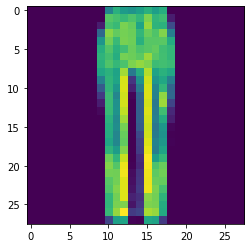

The image is of Trouser


In [104]:
#diplaying image to check
#if data has load correctly
plt.figure()
plt.imshow(train_X[0])
plt.show()
print(f'The image is of {labels[train_Y[0]]}')

In [105]:
#classification network
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)), #flattens the array into 1D
    layers.Dense(units=200, activation='relu'),
    layers.Dropout(rate=0.3), #30% dropout - this helps avoid overfitting
    layers.BatchNormalization(),
    layers.Dense(units=10), #same as no. of classes
    layers.Softmax(), # for probability distribution of output
])

#compile options
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

#early stopping
#to avoid overfitting
#this will stop training if validation accuracy dosent imporve by 0.01 in 10 epochs
early_stopping = keras.callbacks.EarlyStopping(patience=15, min_delta=0.001, restore_best_weights=True)

In [106]:
#training
history = model.fit(
    train_X, train_Y,
    validation_data = (val_X, val_Y),
    epochs=100,
    batch_size=200,
    callbacks = [early_stopping]
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 1s 19us/sample - loss: 1.6816 - accuracy: 0.8016 - val_loss: 1.6356 - val_accuracy: 0.8387
Epoch 2/100
54000/54000 [==============================] - 1s 13us/sample - loss: 1.6238 - accuracy: 0.8488 - val_loss: 1.6183 - val_accuracy: 0.8510
Epoch 3/100
54000/54000 [==============================] - 1s 13us/sample - loss: 1.6147 - accuracy: 0.8566 - val_loss: 1.6149 - val_accuracy: 0.8523
Epoch 4/100
54000/54000 [==============================] - 1s 12us/sample - loss: 1.6085 - accuracy: 0.8613 - val_loss: 1.6136 - val_accuracy: 0.8515
Epoch 5/100
54000/54000 [==============================] - 1s 13us/sample - loss: 1.6035 - accuracy: 0.8647 - val_loss: 1.6109 - val_accuracy: 0.8567
Epoch 6/100
54000/54000 [==============================] - 1s 13us/sample - loss: 1.6001 - accuracy: 0.8674 - val_loss: 1.6022 - val_accuracy: 0.8652
Epoch 7/100
54000/54000 [==========================

Minimum validation loss: 1.5780033866564434


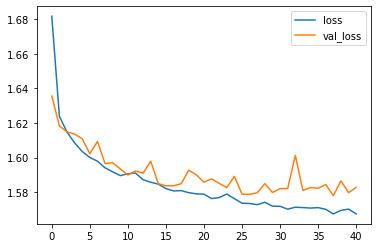

In [107]:
#learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

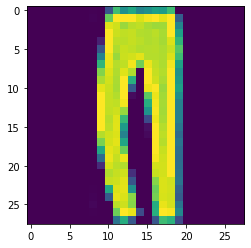

The image is of - Trouser
The model predicted - Trouser


In [108]:
#getting predictions
preds = model.predict(test_X)

plt.figure()
plt.imshow(test_X[2])
plt.show()
print(f'The image is of - {labels[test_Y[2]]}')
print(f'The model predicted - {labels[np.argmax(preds[2])]}')

In [109]:
#model performance
model.evaluate(test_X, test_Y, verbose=2)

10000/10000 - 1s - loss: 1.5893 - accuracy: 0.8715


[1.589319027900696, 0.8715]